<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-aleislasb/blob/main/Semana%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alejandra Islas Blanco 
A01794452

#Module 4. Model Development


4.1 Model Development

In [ ]:
#A model is a mathematical equation that the purpose is to predict based on the behavior of different variables. Here we can relate independent variables to the dependent ones.
#Model Development helps us to predict with more exactitude a result. We can have different types of linear regresion, simple, multiple and polynomial, this depends on the variables taht we have.

4.2 Linear and Multiple Linear Regression

In [ ]:
#The levels on linear regression on a model depends on the variables that we are incluiding on our final model.
#But always goes with the predictor and the target, which the performance of both needs to have a correlation, this relationship gives a linear relationship on which a tendency is represented. 
#Usually all the values can not be exactly on the tendency line, the difference between the final position and the tendency line is the noise, which gives us space to have a difference. 

4.3 Model Visualization Using Visualization

In [ ]:
#Residual Plot shows us the behavior of our correlation talking about the error that the model has, this can show us if we have a linear or non-linear function in order to predict values.
#We can also have distribution plot in order to know the acurracy of our model, comparing them from the predicted and the target values.

4.4 Polynomial Regression and Pipelines 

In [ ]:
#Polynomial describes curvilinear relationships, showing for example a cuadratic expression or for any mathematical expression that implies a change that also has a relation.
#Scaling is important if we have a more variables that are complicated in order to find a correlation.
#Pipeline performs what it is necessary in order to have a prediction, normalization, a polynomial transform and outputs a prediction.

4.5 Measures for In-Sample Evaluation

In [ ]:
#MSE is referred to the difference between the real value and the estimated value squared, at the end we just have the mean of the complete difference. This means that a higher value the most errors we are going to do in our model.
#Coefficient of Determination can be described as the precision of the complete model, if the value is closer to 1, the more precise it is to the real value and accurrate.

4.6 Prediction and Decision Making

In [ ]:
#One easier way to check the information given is just to check that the information makes sense, look on the trends charts and tendency correlation to know which values are not reliable for lack of information or needs a more complex procedure. 
#Visualization is really important since this shows that ours statements are real.

Lab

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm
#The objective is to know the value of the car accoding to the kilometer, so that in our complete dataframe we need to specify which variable is going to be our predictor and our target value.
X = df[['highway-mpg']]
Y = df['price']

In [11]:
lm.fit(X,Y)

LinearRegression()

In [12]:
Yhat=lm.predict(X)
Yhat[0:5]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [13]:
#We consult the interception that is going to be our value, a.
lm.intercept_

38423.3058581574

In [14]:
#And this is going to be the value of the slope, which tends our coefficient of the main values.
lm.coef_

array([-821.73337832])

In [15]:
#As we saw on the first steps, this is another way to predict the value of the car, considering now our predictor as the engine size. 
lm.fit(df[['engine-size']], df[['price']])
lm


LinearRegression()

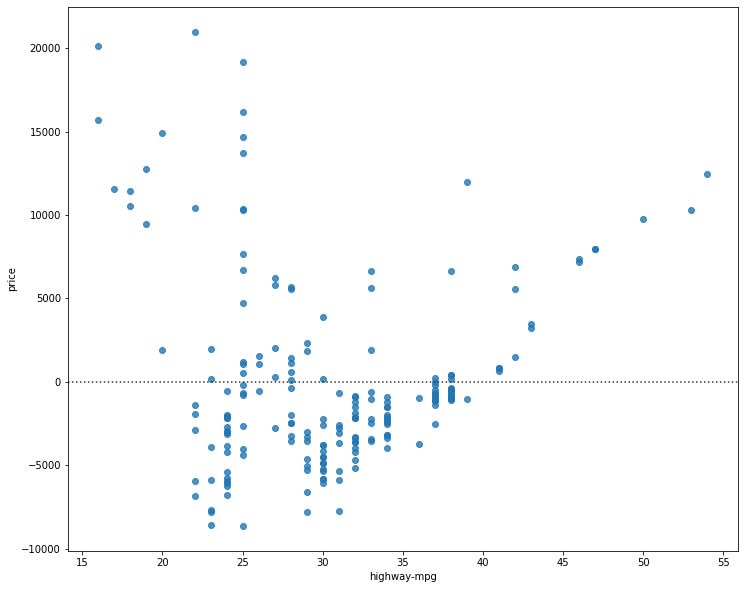

In [16]:
#With this function we can know the residual plot, on which we can know if our approach goes according to the target point.
import seaborn as sns
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

In [17]:
#In this case this formula represents the correlation between the columns selected, in this case evetyrhing shows a negative correlation on which the most near to -1 or 1 is highway and price at the same time.
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [20]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [21]:
#We define the columns on which we like to study its correlation.
x = df['highway-mpg']
y = df['price']

In [22]:

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


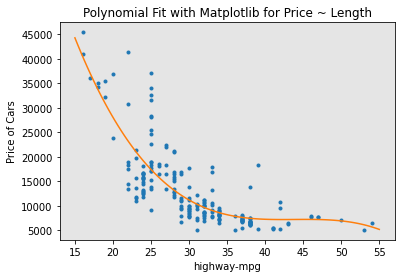

In [23]:
#In this case we obtain the tendency on which is not linear but it has a tendency line on which values can be predicted.
PlotPolly(p, x, y, 'highway-mpg')

In [24]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

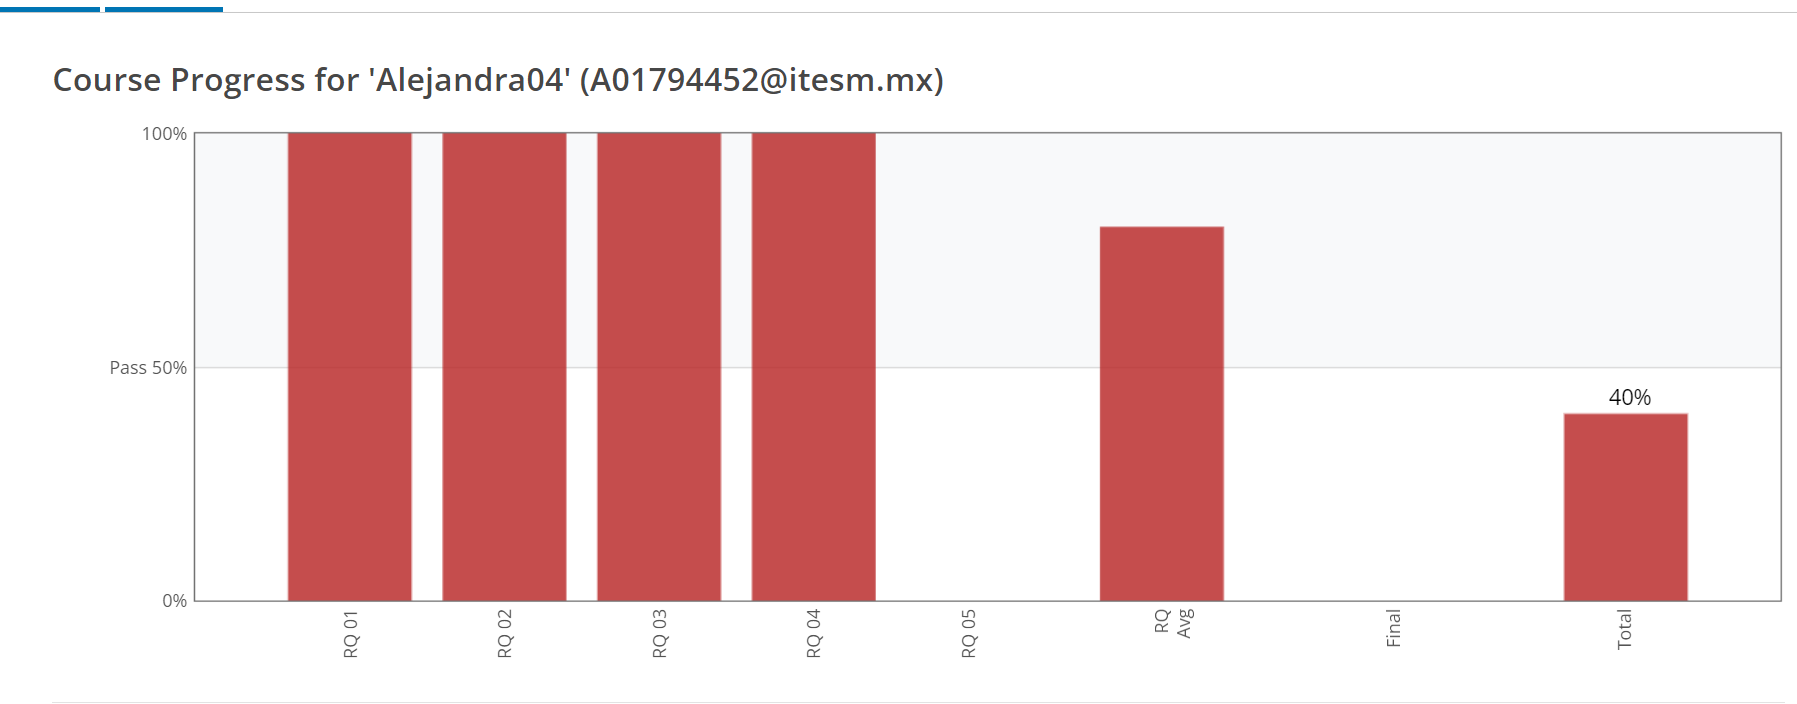